<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Привет! Меня зовут - Сысоева Вера.
    
Далее в файле мои комментарии ты сможешь найти в ячейках, аналогичных данной ( если рамки комментария зелёные - всё сделано правильно; жёлтые - есть замечания, но не критично; красные - нужно переделать). Не удаляй эти комментарии и постарайся учесть их в ходе выполнения проекта.

# Аналитика в Яндекс.Афише

## Содержание проекта

1. [Описание проекта](#step1)  
2. [Описание данных](#step2)
3. [Краткий план выполнения работы](#step3)  
4. [Импорт библиотек](#step4) 
5. [Шаг 1. Загрузить данные и подготовите их к анализу](#step5)
    - 5.1. [Работаем с таблицей - visits](#step6)
    - 5.1. [Работаем с таблицей - orders](#step7)
    - 5.1. [Работаем с таблицей - costs](#step8)
    - 5.1. [Общий вывод по шагу 1 ](#step9)
6. [Шаг 2. Построить отчёты и посчитать метрики](#step10)  
    - 6.1. [Анализ данных по продукту](#step11)
        - 6.1.1. [сколько людей пользуются в день, неделю, месяц?](#step12)
        - 6.1.2. [сколько сессий в день?](#step13)
        - 6.1.3. [сколько длится одна сессия?](#step14)
        - 6.1.4. [как часто люди возвращаются?](#step15)
    - 6.2. [Анализ данных по продажам](#step16)
        - 6.2.1. [когда люди начинают покупать?](#step17)
        - 6.2.2. [сколько раз покупают за период?](#step18)
        - 6.2.3. [какой средний чек?](#step19)
        - 6.2.4. [сколько денег приносят? (LTV)](#step20)
    - 6.3. [Анализ данных по маркетингу](#step21)
        - 6.3.1. [сколько денег потратили? Всего / на каждый источник / по времени](#step22)
        - 6.3.2. [сколько стоило привлечение одного покупателя из каждого источника?](#step23)
        - 6.3.3. [на сколько окупились расходы? (ROI)](#step24)
7. [Шаг 3. Общий вывод по проделанной работе](#step25)

## Описание проекта <a id="step1"></a>   
</div>

Мы работаем в отделе аналитики Яндекс.Афиши. 

**Первое задание: помочь маркетологам оптимизировать маркетинговые затраты.**

У нас в распоряжении есть данные от Яндекс.Афиши с июня 2017 по конец мая 2018 года:
    - лог сервера с данными о посещениях сайта Яндекс.Афиши;
    - выгрузка всех заказов за этот период;
    - статистика рекламных расходов.
    
Необходимо изучить:
    - как люди пользуются продуктом;
    - когда они начинают покупать;
    - сколько денег приносит каждый клиент;
    - когда клиент окупается.

## Описание данных <a id="step2"></a>   
</div>

###### <font color=green>  Таблица visits (лог сервера с информацией о посещениях сайта):
- Uid — уникальный идентификатор пользователя
- Device — категория устройства пользователя
- Start Ts — дата и время начала сессии
- End Ts — дата и время окончания сессии
- Source Id — идентификатор рекламного источника, из которого пришел пользователь

###### <font color=green> Таблица orders (информация о заказах):
- Uid — уникальный id пользователя, который сделал заказ
- Buy Ts — дата и время заказа
- Revenue — выручка Яндекс.Афиши с этого заказа

###### <font color=green> Таблица costs (информация о затратах на маркетинг):
- source_id — идентификатор рекламного источника
- dt — дата
- costs — затраты на этот рекламный источник в этот день

## Краткий план выполнения работы <a id="step3"></a>   
</div>

**1. Шаг 1. Загрузить данные и подготовите их к анализу**
- загрузить данные о визитах, заказах и расходах в переменные;
- оптимизировать данные для анализа;
- убедиться, что тип данных в каждой колонке — правильный.

**2. Шаг 2. Построить отчёты и посчитать метрики**
- Продукт
    - сколько людей пользуются в день, неделю, месяц?
    - сколько сессий в день?
    - сколько длится одна сессия?
    - как часто люди возвращаются?
- Продажи
    - когда люди начинают покупать?
    - сколько раз покупают за период?
    - какой средний чек?
    - сколько денег приносят? (LTV)
- Маркетинг
    - сколько денег потратили? Всего / на каждый источник / по времени
    - сколько стоило привлечение одного покупателя из каждого источника?
    - на сколько окупились расходы? (ROI)
- Отобразите на графиках, как эти метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?
    
**3. Шаг 3. Общий вывод по проделанной работе**
- выдать рекомендации маркетологам, куда и сколько им стоит вкладывать денег?
- выдать рекомендации  по источникам/платформам; 
- объяснить свой выбор: на какие метрики ориентировались? Почему? Какие выводы сделали, узнав значение метрик?

### Импорт библиотек <a id="step4"></a>   
</div>

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st
import copy

### <font color=red> Шаг 1. Загрузить данные и подготовите их к анализу <a id="step5"></a>   
</div>

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

In [3]:
#напишем функцию для первого взгляда на данные
def df_firstView(df):
    print('--------------------------------------------------')
    print('Размер набора данных (строк, столбцов):', df.shape)
    print('--------------------------------------------------')
    print('Количество грубых дубликатов в наборе данных:', df.duplicated().sum())
    print('--------------------------------------------------')
    print('Наименование столбцов:', df.columns)
    print('--------------------------------------------------')
    print('Просмотр типов данных в столбцах')
    print('--------------------------------------------------')
    df.info()
    print('')
    print('--------------------------------------------------')
    print('Вывод случайных 20 строк набора данных')    
    print('--------------------------------------------------')
    print(df.sample(20))

#### Работаем с таблицей - visits <a id="step6"></a>   
</div>

In [4]:
#посмотрим информацию о таблице при помощи ранее созданной функции
df_firstView(visits)

--------------------------------------------------
Размер набора данных (строк, столбцов): (359400, 5)
--------------------------------------------------
Количество грубых дубликатов в наборе данных: 0
--------------------------------------------------
Наименование столбцов: Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid'], dtype='object')
--------------------------------------------------
Просмотр типов данных в столбцах
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB

--------------------------------------------------
Вывод случайных 20 строк набора данных
--------------------------------------------------
         Device     

In [5]:
#для удобства работы, переименуем столбцы в таблице
visits = visits.rename(columns={'Device': 'device',
                                'End Ts': 'session_end',
                                'Source Id': 'source_id',
                                'End Ts': 'session_end', 
                                'Start Ts': 'session_start',
                               'Uid': 'uid'})

Столбцы session_start и session_end содержат сведения о дате и времени, но имеют тип object. 
Изменим формат данных в них.

In [6]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [7]:
#посмотрим что получилось
visits.dtypes

device                   object
session_end      datetime64[ns]
source_id                 int64
session_start    datetime64[ns]
uid                      uint64
dtype: object

#### Работаем с таблицей - orders<a id="step7"></a>   
</div>

In [8]:
#посмотрим информацию о таблице при помощи ранее созданной функции
df_firstView(orders)

--------------------------------------------------
Размер набора данных (строк, столбцов): (50415, 3)
--------------------------------------------------
Количество грубых дубликатов в наборе данных: 0
--------------------------------------------------
Наименование столбцов: Index(['Buy Ts', 'Revenue', 'Uid'], dtype='object')
--------------------------------------------------
Просмотр типов данных в столбцах
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB

--------------------------------------------------
Вывод случайных 20 строк набора данных
--------------------------------------------------
                    Buy Ts  Revenue                   Uid
16820  2017-11-09 17:45:00     0.30   9941803697234023450
3590   20

In [9]:
#для удобства работы, переименуем столбцы в таблице
orders = orders.rename(columns={'Buy Ts': 'date_of_purchase',
                                'Revenue': 'revenue',
                                'Uid': 'uid'})

Столбец date_of_purchase содержит сведения о дате и времени, но имеет тип object. Изменим формат данных.

In [10]:
orders['date_of_purchase'] = pd.to_datetime(orders['date_of_purchase'])

In [11]:
#посмотрим что получилось
orders.dtypes

date_of_purchase    datetime64[ns]
revenue                    float64
uid                         uint64
dtype: object

#### Работаем с таблицей - costs <a id="step8"></a>   
</div>

In [12]:
#посмотрим информацию о таблице при помощи ранее созданной функции
df_firstView(costs)

--------------------------------------------------
Размер набора данных (строк, столбцов): (2542, 3)
--------------------------------------------------
Количество грубых дубликатов в наборе данных: 0
--------------------------------------------------
Наименование столбцов: Index(['source_id', 'dt', 'costs'], dtype='object')
--------------------------------------------------
Просмотр типов данных в столбцах
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB

--------------------------------------------------
Вывод случайных 20 строк набора данных
--------------------------------------------------
      source_id          dt   costs
799           3  2017-08-13  179.91
906           3  2017-11-28  701.35
2221         10  2

In [13]:
#для удобства работы, переименуем столбцы в таблице
costs = costs.rename(columns={'dt': 'date'})

Столбец date содержит сведения о дате и времени, но имеет тип object. Изменим формат данных.

In [14]:
costs['date'] = pd.to_datetime(costs['date'], format='%Y-%m-%d')

In [15]:
#посмотрим что получилось
costs.dtypes

source_id             int64
date         datetime64[ns]
costs               float64
dtype: object

#### Общий вывод по шагу 1 <a id="step9"></a>   
</div>

Данные готовы для работы, критичных замечаний нет, пропусков и дубликатов не обнаружено, проведена работа по подготовке типов данных и названий столбцов для удобной и продуктивной работы.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Хорошо, ты верно использовал все методы для анализа сырых данных. Действительно, единственная проблема - это даты. Можно переходить к анализу.

### <font color=red> Шаг 2. Построить отчёты и посчитать метрики<a id="step10"></a>   
</div>




- Отобразите на графиках, как эти метрики отличаются по устройствам и по рекламным источникам? Как они меняются во времени?

###### <font color=green> Анализ данных по продукту <a id="step11"></a>   
</div>

- сколько людей пользуются в день, неделю, месяц?
- сколько сессий в день?
- сколько длится одна сессия?
- как часто люди возвращаются?

**Ответим на вопрос - сколько людей пользуются сервисом в день, неделю, месяц?** <a id="step12"></a>   
</div>

In [16]:
visits['duration'] = (visits['session_end'] - visits['session_start']).dt.seconds
visits['start_ts_day'] = visits['session_start'].dt.date
visits['start_ts_week'] = pd.DatetimeIndex(visits['session_start']).week
visits['start_ts_month'] = pd.DatetimeIndex(visits['session_start']).month
visits['start_ts_year'] = pd.DatetimeIndex(visits['session_start']).year

dau = visits.groupby(['start_ts_day']).agg({'uid':'nunique'}).mean()
wau = visits.groupby(['start_ts_year', 'start_ts_week']).agg({'uid':'nunique'}).mean()
mau = visits.groupby(['start_ts_year', 'start_ts_month']).agg({'uid':'nunique'}).mean()
print('В день сервисом в среднем пользуются {} человек'.format(int(dau)))
print('В неделю сервисом в среднем пользуются {} человек'.format(int(wau)))
print('В месяц сервисом в среднем пользуются {} человек'.format(int(mau)))

sticky_wau = dau / wau
sticky_mau = dau / mau
print('Недельная вовлеченность аудитории: {:.1%}'.format(sticky_wau[0]))
print('Месячная вовлеченность аудитории: {:.1%}'.format(sticky_mau[0]))

В день сервисом в среднем пользуются 907 человек
В неделю сервисом в среднем пользуются 5716 человек
В месяц сервисом в среднем пользуются 23228 человек
Недельная вовлеченность аудитории: 15.9%
Месячная вовлеченность аудитории: 3.9%


<font color=orange> **Вовлеченность аудитории слабая, сервисом пользуются редко.** </font>
    
    
<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Да, все верно рассчитано, хорошо использовано groupby.

**Ответим на вопрос - Сколько сессий в день?** <a id="step13"></a>   
</div>

In [17]:
day_visits = visits.groupby(['start_ts_day']).agg({'uid':'count'})
print('Количество сессий в день - {}'.format(int(day_visits.mean()[0])))

Количество сессий в день - 987


**Ответим на вопрос - сколько длится одна сессия?** <a id="step14"></a>   
</div>

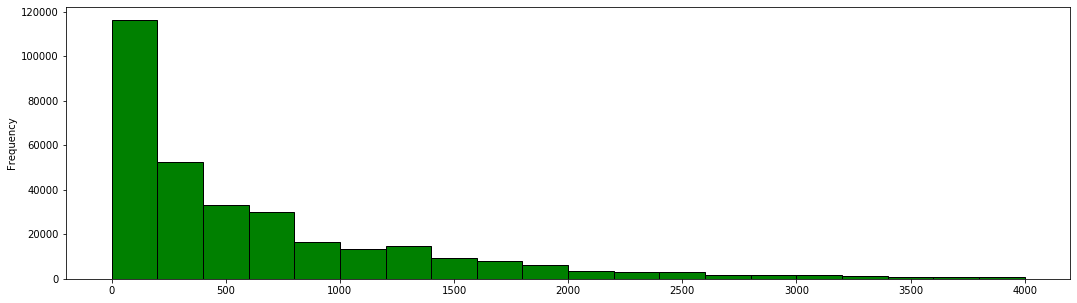

count    323606.000000
mean        714.684623
std        1047.052806
min          19.000000
25%         120.000000
50%         360.000000
75%         900.000000
max       84480.000000
Name: duration, dtype: float64


In [18]:
visits['duration'] = (visits['session_end'] - visits['session_start']).dt.seconds
durations_of_visits = visits[visits['duration'] != 0]['duration']
durations_of_visits.plot(kind = 'hist', color = 'green',ec='black', bins = 20, figsize = (18,5), range = (0, 4000))
plt.show()
print(durations_of_visits.describe())


Согласно гистограмме выше, распределение длительности сессий не похоже на нормальное распределение, следовательно необходимо использовать значение встречающееся наиболее часто - моду.
Вычислим это значение.

In [19]:
mean_session = visits[visits['duration'] != '0 seconds']['duration'].mode()
print('Длительность одной сессии составляет {} секунд'.format(mean_session[0]))

Длительность одной сессии составляет 60 секунд


/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Все верно. Мода действительно самый важный параметр здесь.

**Ответим на вопрос - Как часто люди возвращаются?** <a id="step15"></a>   
</div>

In [20]:
#найдем среднее количество сессий на одного пользователя
sessions_per_user = len(visits) / len(visits['uid'].unique())
print('В среднем на одного пользователя приходится {:.1f} сессии \n'.format(sessions_per_user))

В среднем на одного пользователя приходится 1.6 сессии 



Вновь находим подтверждение того что сервисом пользуются редко.

Рассчитаем Retention Rate - узнаем как часто возвращаются пользователи в рамках когорт.

In [21]:
#найдем первую активность пользователей
first_activity = visits.groupby('uid').agg({'session_start':'min'})
first_activity.columns = ['first_activity']
visits = visits.join(first_activity, on='uid')

In [22]:
#создадим новый датафрейм чтобы не видеть не нужные столбцы
visits_rr = visits[['uid', 'first_activity', 'session_start']]
visits_rr['first_activity_month'] = visits_rr['first_activity'].astype('datetime64[M]')
visits_rr['start_ts_month'] = visits_rr['session_start'].astype('datetime64[M]')
visits_rr['lifetime'] = ((visits_rr['start_ts_month'] - visits_rr['first_activity_month']) / np.timedelta64(1, 'M')).round().astype('int')
visits_rr.head(5)
cohorts_visits = visits_rr.groupby(['first_activity_month', 'lifetime']).agg({'uid':'nunique'}).reset_index()
initial_users_count = cohorts_visits[cohorts_visits['lifetime'] == 0][['first_activity_month', 'uid']]
initial_users_count.columns = ['first_activity_month', 'cohort_users']
initial_users_count = initial_users_count.set_index('first_activity_month')

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_i

In [23]:
cohorts_visits = cohorts_visits.join(initial_users_count, on = 'first_activity_month')

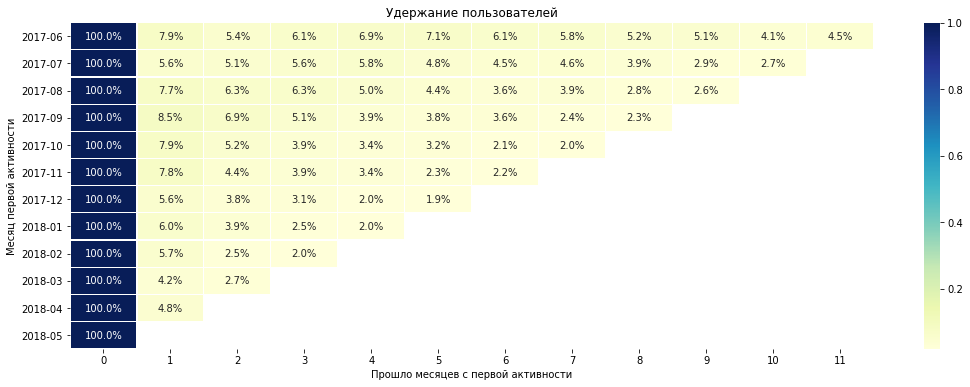

In [24]:
#построим heatmap возвращения пользователей
cohorts_visits['retention'] = cohorts_visits['uid'] / cohorts_visits['cohort_users']

retention_pivot = cohorts_visits.pivot_table(index='first_activity_month',
                                      columns='lifetime',
                                      values='retention',
                                      aggfunc='sum')

retention_pivot = retention_pivot.reset_index()
retention_pivot['first_activity_month'] = retention_pivot['first_activity_month'].dt.strftime('%Y-%m')
retention_pivot = retention_pivot.set_index('first_activity_month')
retention_pivot

plt.figure(figsize=(18, 6))
plt.title('Удержание пользователей')
sns.heatmap(retention_pivot, annot=True, fmt=".1%", linewidths=.2,cmap="YlGnBu", linecolor = 'white')
plt.ylabel('Месяц первой активности')
plt.xlabel('Прошло месяцев с первой активности')
plt.show()

<font color=orange> **На основании проведенной работы, можно сделать вывод - пользователи возвращаются редко.**

<div style="border:solid gold 2px; padding: 20px"> <h1 style="color:gold; margin-bottom:20px">Комментарий наставника</h1>

Все верно рассчитано. А вот для тепловой карты можно настроить vmin и vmax.

###### <font color=green> Анализ данных по продажам <a id="step16"></a>   
</div>

- когда люди начинают покупать?
- сколько раз покупают за период?
- какой средний чек?
- сколько денег приносят? (LTV)

**Ответим на вопрос - когда люди начинают покупать?** <a id="step17"></a>   
</div>

In [25]:
#найдём время и дату первой сессии 
first_sessions = visits.groupby(['uid']).agg({'session_start':'min', 'source_id':'first'})
first_sessions.columns = ['first_activity', 'first_source']

In [26]:
#найдем время первой покупки
first_orders = orders.groupby(['uid']).agg({'date_of_purchase':'min'})
first_orders.columns = ['first_buy_ts']

In [27]:
#добавим дату и время первой сессии в информацию по первым заказам
first_orders = first_orders.join(first_sessions,on='uid')

Медиана времени с первой сессии до первой покупки: 16 минут
Среднее время с певрой сессии до первой покупки: 16 дней
Мода времени с певрой сессии до первой покупки: 1 минута


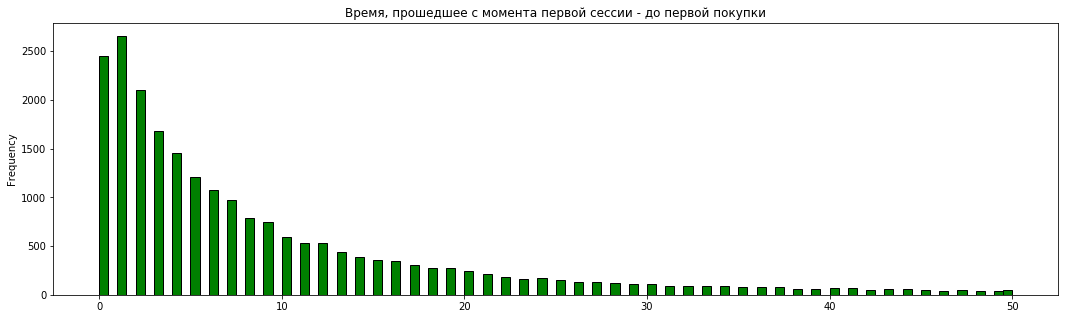

In [28]:
#найдем время, прошедшее с момента первой сессии до первой покупки
first_orders['time_to_first_purchase'] = (first_orders['first_buy_ts'] - 
                                          first_orders['first_activity']) / np.timedelta64(1, 'm')

first_orders['time_to_first_purchase'].plot(kind = 'hist', 
                                            bins = 100, 
                                            color = 'green',
                                            ec='black',
                                            range = (0,50), 
                                            figsize = (18,5), 
                                            title = 'Время, прошедшее с момента первой сессии - до первой покупки')

print('Медиана времени с первой сессии до первой покупки: {} минут'
      .format(int(first_orders['time_to_first_purchase'].median())))

print('Среднее время с певрой сессии до первой покупки: {} дней'
      .format(int(first_orders['time_to_first_purchase'].mean()/60/24)))

print('Мода времени с певрой сессии до первой покупки: {} минута'
      .format(int(first_orders['time_to_first_purchase'].mode())))

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

    Ок, фактически в первый визит покупают - это стоило отметить.

**Ответим на вопрос - сколько раз покупают за период?** <a id="step18"></a>   
</div>

In [29]:
#добавим в orders дату первого заказа и выведем в отдельный столбец месяц первого заказа
orders = orders.join(first_orders, on='uid')
orders['first_buy_month'] = orders['first_buy_ts'].astype('datetime64[M]')
orders['first_session_month'] = orders['first_activity'].astype('datetime64[M]')
orders['buy_month'] = orders['date_of_purchase'].astype('datetime64[M]')

In [30]:
#рассчитаем количество покупок на одного пользователя в разный период
orders['buy_date'] = orders['date_of_purchase'].dt.date
orders['buy_week'] = orders['date_of_purchase'].dt.week
orders['buy_year'] = orders['date_of_purchase'].dt.year
day_purchases_per_user = orders.groupby(['buy_date', 'uid']).agg({'date_of_purchase':'count'}).mean()[0]
week_purchases_per_user = orders.groupby(['buy_year', 'buy_week', 'uid']).agg({'date_of_purchase':'count'}).mean()[0]
month_purchases_per_user = orders.groupby(['buy_month', 'uid']).agg({'date_of_purchase':'count'}).mean()[0]
year_purchases_per_user = orders.groupby(['buy_year', 'uid']).agg({'date_of_purchase':'count'}).mean()[0]
print('''В среднем на одного пользователя покупок:
В день - {:.2f},
В неделю - {:.2f},
В месяц - {:.2f},
В год - {:.2f}
'''.format(day_purchases_per_user, week_purchases_per_user, month_purchases_per_user, year_purchases_per_user))

В среднем на одного пользователя покупок:
В день - 1.08,
В неделю - 1.16,
В месяц - 1.23,
В год - 1.32



<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Все верно, но можно было динамику рассмотреть.

**Ответим на вопрос - какой средний чек?** <a id="step19"></a>   
</div>


Средний чек составляет 5.00 $


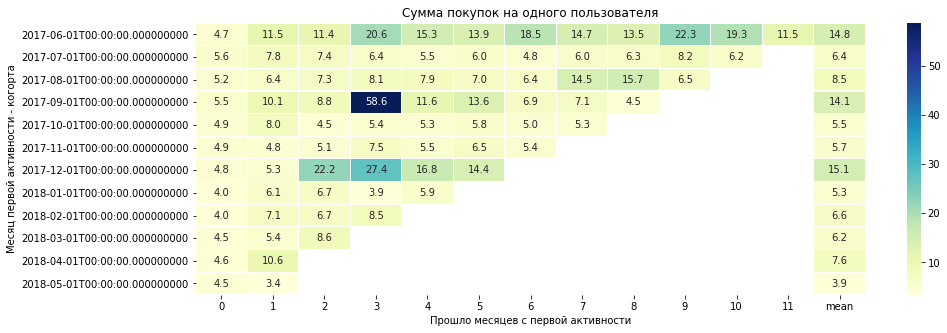

In [31]:
#посчитаем lifetime заказов
orders['lifetime_fa_b'] = ((orders['buy_month'] - orders['first_session_month']) / np.timedelta64(1, 'M')).round().astype('int')
#сгруппируем заказы по когортам и lifetime и суммам покупок на одного пользователя
orders_grouped_by_cohorts = orders.groupby(['first_session_month', 'lifetime_fa_b']).agg({'revenue':'sum', 'uid':'nunique'}).reset_index()
orders_grouped_by_cohorts.columns = ['first_session_month', 'lifetime_fa_b', 'revenue_total', 'n_users']
orders_grouped_by_cohorts['revenue_per_user'] = orders_grouped_by_cohorts['revenue_total'] / orders_grouped_by_cohorts['n_users']
# orders_grouped_by_cohorts['first_session_month'] = orders_grouped_by_cohorts['first_session_month'].dt.strftime('%Y-%m')

#создадим сводную таблицу с когортным анализом суммы покупок на пользователя 
cohorts_revenue_per_user = orders_grouped_by_cohorts.pivot_table(index = 'first_session_month', columns = 'lifetime_fa_b', values = 'revenue_per_user', aggfunc = 'mean')
cohorts_revenue_per_user['mean'] = cohorts_revenue_per_user.mean(axis=1)

plt.figure(figsize=(15, 5))
plt.title('Сумма покупок на одного пользователя')
sns.heatmap(cohorts_revenue_per_user, annot=True, fmt=".1f", linewidths=.2, cmap="YlGnBu", linecolor = 'white')
plt.xlabel('Прошло месяцев с первой активности')
plt.ylabel('Месяц первой активности - когорта')

print('Средний чек составляет {:.2f} $'.format(orders['revenue'].mean()))

<div style="border:solid gold 2px; padding: 20px"> <h1 style="color:gold; margin-bottom:20px">Комментарий наставника</h1>

Хорошо, но стоило также рассмотреть динамику, а не когорты. При рассмотрении динамики была бы видна определенная сезонность и.т.п..

**Ответим на вопрос - сколько денег приносят? (расчет LTV)** <a id="step20"></a>   
</div>

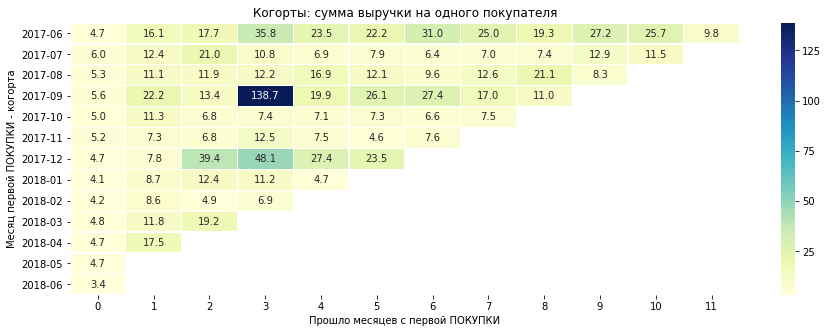

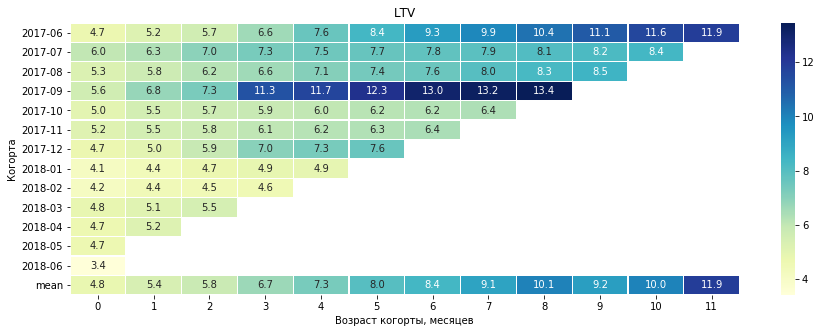

In [32]:
orders['age_cohort'] = ((orders['buy_month'] - orders['first_buy_month']) / np.timedelta64(1, 'M')).round().astype('int')
cohort_sizes_ltv = orders.groupby('first_buy_month').agg({'uid':'nunique'})
cohort_sizes_ltv.columns = ['cohort_size']
orders_grouped_by_cohorts_ltv = orders.groupby(['first_buy_month', 'age_cohort']).agg({'revenue':'sum', 'uid':'nunique'}).reset_index()
orders_grouped_by_cohorts_ltv = orders_grouped_by_cohorts_ltv.join(cohort_sizes_ltv, on='first_buy_month')
orders_grouped_by_cohorts_ltv['ltv'] = orders_grouped_by_cohorts_ltv['revenue'] / orders_grouped_by_cohorts_ltv['cohort_size']
orders_grouped_by_cohorts_ltv['revenue_per_user'] = orders_grouped_by_cohorts_ltv['revenue'] / orders_grouped_by_cohorts_ltv['uid']

#когортный анализ суммы покупок на одного человека
cohorts_revenue_per_user_2 = orders_grouped_by_cohorts_ltv.pivot_table(
index = 'first_buy_month', columns = 'age_cohort', values = 'revenue_per_user', aggfunc='mean').reset_index()
cohorts_revenue_per_user_2['first_buy_month'] = cohorts_revenue_per_user_2['first_buy_month'].dt.strftime('%Y-%m')
cohorts_revenue_per_user_2 = cohorts_revenue_per_user_2.set_index('first_buy_month')
plt.figure(figsize=(15, 5))
plt.title('Когорты: сумма выручки на одного покупателя')
sns.heatmap(cohorts_revenue_per_user_2, annot=True, fmt=".1f", linewidths=.2, cmap="YlGnBu", linecolor = 'white')
plt.xlabel('Прошло месяцев с первой ПОКУПКИ')
plt.ylabel('Месяц первой ПОКУПКИ - когорта')
plt.show()

#когортный анализ LTV
ltv = orders_grouped_by_cohorts_ltv.pivot_table(
index = 'first_buy_month', columns = 'age_cohort', values = 'ltv', aggfunc = 'mean')
ltv = ltv.cumsum(axis = 1)
ltv = ltv.reset_index()
ltv['first_buy_month'] = ltv['first_buy_month'].dt.strftime('%Y-%m')
ltv = ltv.set_index('first_buy_month')
ltv.loc['mean'] = ltv.mean()
ltv = ltv.round(2)
ltv

plt.figure(figsize=(15, 5))
plt.title('LTV')
sns.heatmap(ltv, annot=True, fmt=".1f", linewidths=.2, cmap="YlGnBu", linecolor = 'white')
plt.xlabel('Возраст когорты, месяцев')
plt.ylabel('Когорта')
plt.show()

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Да, все верно рассчитано и максимально наглядно отображено.

###### <font color=green> Анализ данных по маркетингу <a id="step21"></a>   
</div>

- сколько денег потратили? Всего / на каждый источник / по времени
- сколько стоило привлечение одного покупателя из каждого источника?
- на сколько окупились расходы? (ROI)

**Ответим на вопрос - сколько денег потратили? (всего / на каждый источник / по времени)** <a id="step22"></a>   
</div>


Всего потрачено на каждый из источников


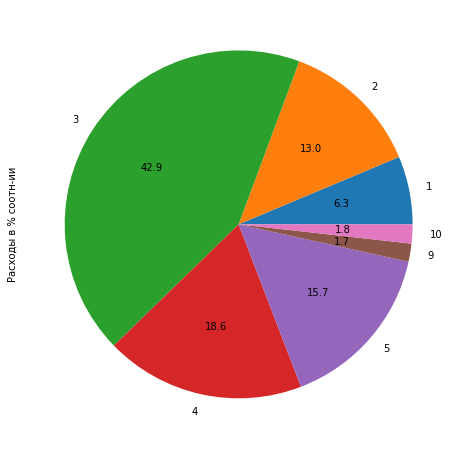

               costs
source_id           
1           20833.27
2           42806.04
3          141321.63
4           61073.60
5           51757.10
9            5517.49
10           5822.49

Всего потрачено на маркетинг 329131.62 $


In [33]:
costs['cost_month'] = costs['date'].astype('datetime64[M]')

print('\nВсего потрачено на каждый из источников')
costs.groupby('source_id').sum().plot(y = 'costs', 
                                      autopct='%.1f', 
                                      kind = 'pie', 
                                      figsize = (8, 8), 
                                      legend = False)
plt.ylabel('Расходы в % соотн-ии')
plt.show()
print(costs.groupby('source_id').sum())
print()
print('Всего потрачено на маркетинг {} $'.format(costs['costs'].sum()))

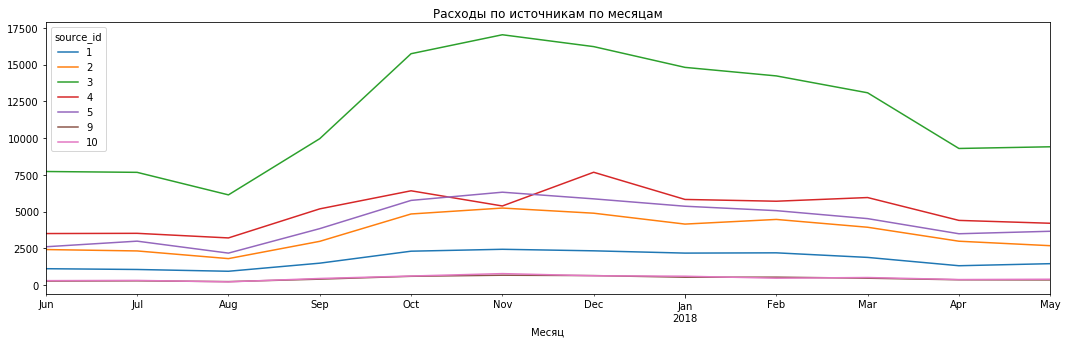

In [34]:
#построим график расходов на маркетинг по источникам в месяц
costs_pivot = costs.pivot_table(index = 'cost_month', 
                                columns = 'source_id', 
                                values = 'costs', 
                                aggfunc = 'sum')
costs_pivot.plot(figsize = (18,5), 
                 title = 'Расходы по источникам по месяцам')
plt.xlabel('Месяц')
plt.show()

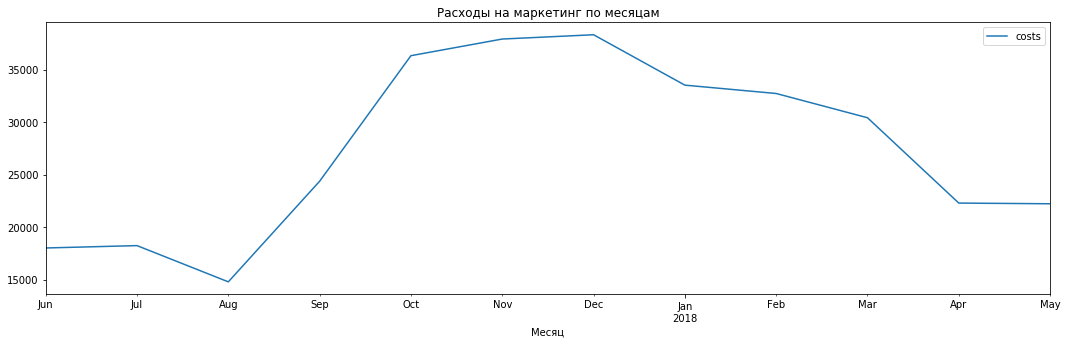

In [35]:
#построим график суммарных расходов на маркетинг по источникам в месяц
costs.pivot_table(index = 'cost_month', values = 'costs', aggfunc = 'sum').plot(
    title = 'Расходы на маркетинг по месяцам', 
    figsize = (18,5))
plt.xlabel('Месяц')
plt.show()

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

хорошо, диаграммы выбраны верно.

**Ответим на вопрос - сколько стоило привлечение одного покупателя из каждого источника?** <a id="step23"></a>   
</div>

In [36]:
#Найдем количество пришедших пользователей в сервис по маркетинговым источникам
print('Кол-во пользователей приходивших в сервис по разному кол-ву источников:')
print(visits.groupby('uid').agg({'source_id':'nunique'})['source_id'].value_counts())

visits_sources_none = visits[['uid', 'session_start', 'session_end', 'first_activity', 'source_id']]
visits_sources_none = visits_sources_none.join(first_orders[['first_buy_ts']], on='uid')

Кол-во пользователей приходивших в сервис по разному кол-ву источников:
1    190449
2     28642
3      6792
4      1761
5       442
6        74
7         9
Name: source_id, dtype: int64


In [37]:
#напишем функцию проверки сессий на факт покупки
def what_session(row):
    if row['session_start']<=row['first_buy_ts']<=row['session_end']:
        return True
    else:
        return False

#найдем сессии в которые совершили покупки
visits_sources_none['buy_session'] = visits_sources_none.apply(what_session, axis = 1)

In [38]:
#напишем функцию проверки маркетингового источника перед первой покупкой
def before_first_purchase(row):
    if row['session_start'] <= row['first_buy_ts']:
        return True
    else:
        return False
visits_sources_none['before_first_purchase'] = visits_sources_none.apply(before_first_purchase, axis = 1)

In [39]:
#найдем распределение использования маркетинговых источников перед первой покупкой
visits_before_first_purchase = visits_sources_none[(visits_sources_none['before_first_purchase'] == 
                                                    True)&(visits_sources_none['buy_session'] == False)]

sources_before_first_purchase = visits_before_first_purchase.pivot_table(index = 'uid', 
                                                                         columns = 'source_id', 
                                                                         values = 'before_first_purchase', 
                                                                         aggfunc = 'sum')

sources_before_first_purchase['sessions_before_first_purchase'] = sources_before_first_purchase.sum(axis = 1)

print('Сессий на 1 пользователя перед покупкой: {:.2f}'.format(sources_before_first_purchase['sessions_before_first_purchase'].mean()))

print('Всего сессий на 1 пользователя: {:.2f}'.format(sessions_per_user))
sources_before_first_purchase = sources_before_first_purchase.fillna(0)
sources_before_first_purchase = sources_before_first_purchase.astype('int')

for i in range(1,11):
    try:
        print('Источник {} - используется до первой покупки {:.1%} пользователями'.format(i, sources_before_first_purchase[i].mean()))
    except:
            print('Источник {} - используется до первой покупки 0.0% пользователями'.format(i))

Сессий на 1 пользователя перед покупкой: 1.77
Всего сессий на 1 пользователя: 1.58
Источник 1 - используется до первой покупки 23.2% пользователями
Источник 2 - используется до первой покупки 28.9% пользователями
Источник 3 - используется до первой покупки 39.8% пользователями
Источник 4 - используется до первой покупки 44.2% пользователями
Источник 5 - используется до первой покупки 26.4% пользователями
Источник 6 - используется до первой покупки 0.0% пользователями
Источник 7 - используется до первой покупки 0.0% пользователями
Источник 8 - используется до первой покупки 0.0% пользователями
Источник 9 - используется до первой покупки 8.4% пользователями
Источник 10 - используется до первой покупки 5.7% пользователями


In [40]:
#найдем распределение использования маркетинговых источников во время покупки
visits_purchase = visits_sources_none[visits_sources_none['buy_session'] == True]
sources_first_purchase = visits_purchase.pivot_table(index = 'uid', 
                                                     columns = 'source_id', 
                                                     values = 'before_first_purchase', 
                                                     aggfunc = 'sum')
sources_first_purchase = sources_first_purchase.fillna(0)
sources_first_purchase = sources_first_purchase.astype('int')

for i in range(1,11):
    try:
        print('Источник {} - используется во время покупки {:.1%} пользователями'.format(i, sources_first_purchase[i].mean()))
    except:
            print('Источник {} - используется во время покупки 0.0% пользователями'.format(i))

Источник 1 - используется во время покупки 12.6% пользователями
Источник 2 - используется во время покупки 10.5% пользователями
Источник 3 - используется во время покупки 24.6% пользователями
Источник 4 - используется во время покупки 26.1% пользователями
Источник 5 - используется во время покупки 20.6% пользователями
Источник 6 - используется во время покупки 0.0% пользователями
Источник 7 - используется во время покупки 0.0% пользователями
Источник 8 - используется во время покупки 0.0% пользователями
Источник 9 - используется во время покупки 2.0% пользователями
Источник 10 - используется во время покупки 3.6% пользователями


In [41]:
#найдем распределение использования маркетинговых источников
sources_all_visits = visits_sources_none.pivot_table(index = 'uid', 
                                                     columns = 'source_id', 
                                                     values = 'session_start', 
                                                     aggfunc = 'count')
sources_all_visits = sources_all_visits.fillna(0)
sources_all_visits = sources_all_visits.astype('int')

for i in range(1,11):
    try:
        print('Источник source_{} - используется {:.1%} пользователями'.format(i, sources_all_visits[i].mean()))
    except:
            print('Источник source_{} - используется 0.0% пользователями'.format(i))

Источник source_1 - используется 15.0% пользователями
Источник source_2 - используется 20.9% пользователями
Источник source_3 - используется 37.5% пользователями
Источник source_4 - используется 44.6% пользователями
Источник source_5 - используется 29.3% пользователями
Источник source_6 - используется 0.0% пользователями
Источник source_7 - используется 0.0% пользователями
Источник source_8 - используется 0.0% пользователями
Источник source_9 - используется 5.8% пользователями
Источник source_10 - используется 4.4% пользователями


In [42]:
visits_sources_none['ts_month'] = visits_sources_none['session_start'].astype('datetime64[M]')
visits_to_first_purchase = visits_sources_none[visits_sources_none['before_first_purchase'] == True]
visits_to_first_purchase_pivot = visits_to_first_purchase.pivot_table(index = 'ts_month', 
                                                                      columns = 'source_id', 
                                                                      values = 'session_start', 
                                                                      aggfunc = 'count')
visits_to_first_purchase_pivot['visits_to_purchase'] = visits_to_first_purchase_pivot.sum(axis = 1)
visits_to_first_purchase_pivot
for i in range(1,11):
    try:
        visits_to_first_purchase_pivot[i] = visits_to_first_purchase_pivot[i] / visits_to_first_purchase_pivot['visits_to_purchase']
    except:
        0

In [43]:
visits_to_first_purchase_pivot = visits_to_first_purchase_pivot[[1, 2, 3, 4, 5, 9, 10]].round(2).reset_index()
visits_to_first_purchase_pivot['ts_month'] = visits_to_first_purchase_pivot['ts_month'].dt.strftime('%Y-%m')
visits_to_first_purchase_pivot = visits_to_first_purchase_pivot.set_index('ts_month')

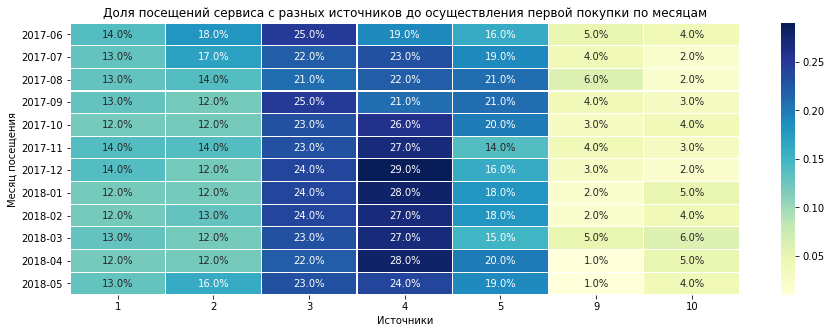

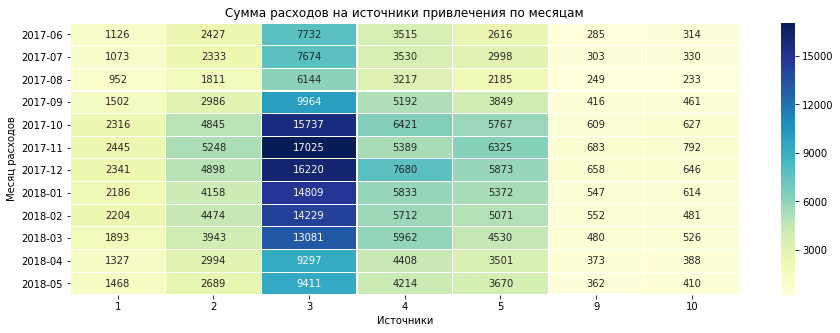

In [44]:
plt.figure(figsize=(15, 5))
plt.title('Доля посещений сервиса с разных источников до осуществления первой покупки по месяцам')
sns.heatmap(visits_to_first_purchase_pivot, annot=True, fmt=".1%", linewidths=.2, cmap="YlGnBu", linecolor = 'white')
plt.xlabel('Источники')
plt.ylabel('Месяц посещения')
plt.show()

costs_pivot = costs_pivot.reset_index()
costs_pivot['cost_month'] = costs_pivot['cost_month'].dt.strftime('%Y-%m')
costs_pivot = costs_pivot.set_index('cost_month')

plt.figure(figsize=(15, 5))
plt.title('Сумма расходов на источники привлечения по месяцам')
sns.heatmap(costs_pivot, annot=True, fmt=".0f", linewidths=.2, cmap="YlGnBu", linecolor = 'white')
plt.xlabel('Источники')
plt.ylabel('Месяц расходов')
plt.show()

Мы не можем учитывать только источник первого посещения или источник по которому совершили саму покупку
для определения ценности источников, поэтому мы учитываем использование всех источников перехода на сервис,
но в %-ном соотношении, при этом мы не привязываемся к месяцу покупки, так как в нашем расчете мы используем
только те посещения, которые в конечном счете привели к покупке.
Можно представить это так - в месяц 2017-06 - купившие в дальнейшем (может и не в этот месяц) пользователи переходили на сервис именно из источника №3 в 25% случаев, конечно же при этом мы понимаем, что до покупки эти пользоватли могли посетить сервис не один раз.

Посчитаем стоимость привлечения клиентов из разных источников, учитывая источники покупки(а не первого посещения), а так же посчитаем конверсию по источникам.

In [45]:
uid_first_source = visits_sources_none.groupby('uid').agg({'buy_session':'sum',
                                                           'session_start':'min',
                                                           'source_id':'first', 
                                                           'ts_month':'first'})
sources_count = uid_first_source.pivot_table(index = 'ts_month', 
                                             columns = 'source_id', 
                                             values = 'buy_session', 
                                             aggfunc = ['sum', 'count'])

In [46]:
for i in range(1, 11):
    try:
        sources_count[i] = sources_count['sum'][i] / sources_count['count'][i]
    except:
        np.nan
sources_conversion = sources_count[[1, 2, 3, 4, 5, 9, 10]].reset_index()
sources_conversion['ts_month'] = sources_conversion['ts_month'].dt.strftime('%Y-%m')
sources_conversion = sources_conversion.set_index('ts_month')

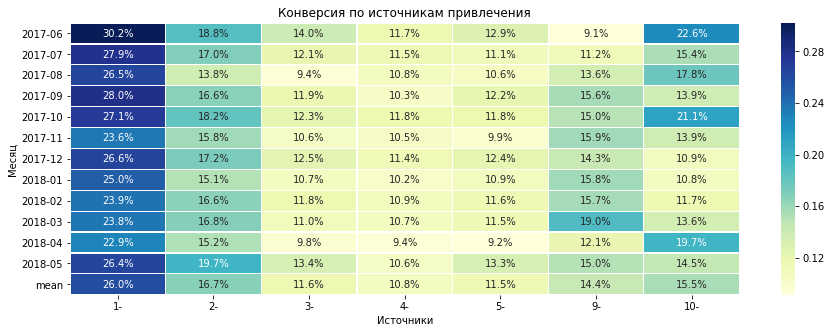

In [47]:
sources_conversion.loc['mean'] = sources_conversion.mean()

plt.figure(figsize=(15, 5))
plt.title('Конверсия по источникам привлечения')
sns.heatmap(sources_conversion, annot=True, fmt=".1%", linewidths=.2, cmap="YlGnBu", linecolor = 'white')
plt.xlabel('Источники')
plt.ylabel('Месяц')
plt.show()

<font color=orange> Наиболее эффективен источник 1 - это видно из конверсии.
Выдаем рекомендацию маркетологам вкладывать в источники с наибольшей конверсией - 1, 2, 9, 10.
    
<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Конверсия - это важный параметр, отличный анализ, даже сверх требований проекта.

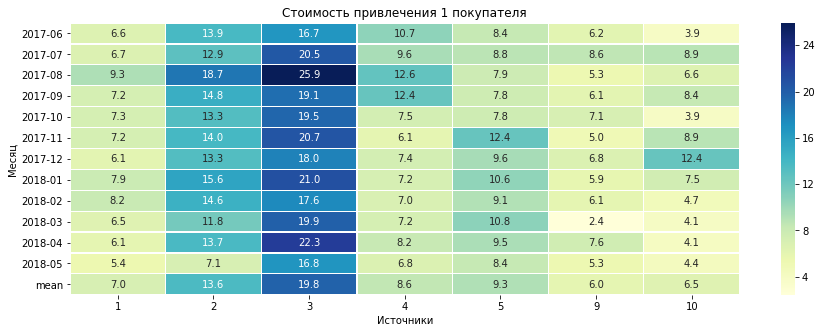

In [48]:
number_purchases = uid_first_source.pivot_table(index = 'ts_month', 
                                                columns = 'source_id', 
                                                values = 'buy_session', 
                                                aggfunc = 'sum')
number_purchases = number_purchases[[1, 2, 3, 4, 5, 9, 10]]

cost_one_buyer_by_sources = pd.DataFrame()
for i in range(1,11):
    try:
        cost_one_buyer_by_sources[i] = costs_pivot[i] / number_purchases[i]
    except:
        continue
cost_one_buyer_by_sources.loc['mean'] = cost_one_buyer_by_sources.mean()
cost_one_buyer_by_sources

plt.figure(figsize=(15, 5))
plt.title('Стоимость привлечения 1 покупателя')
sns.heatmap(cost_one_buyer_by_sources, annot=True, fmt=".1f", linewidths=.2, cmap="YlGnBu", linecolor = 'white')
plt.xlabel('Источники')
plt.ylabel('Месяц')
plt.show()

<font color=orange> Самый "популярный" у маркетологов источник №3 самый дорогой, необходимо рассмотреть более дешевые источники привлечения - 1, 9, 10, 2 либо работать над конверсией источника №3.

**Ответим на вопрос - на сколько окупились расходы? (ROI)** <a id="step24"></a>   
</div>

In [49]:
orders_grouped_by_cohorts_ltv = orders_grouped_by_cohorts_ltv.set_index('first_buy_month')

In [50]:
costs_by_month = costs.pivot_table(index = 'cost_month', values = 'costs', aggfunc = 'sum').reset_index()
costs_by_month.columns = ['first_buy_month', 'costs']
costs_by_month = costs_by_month.set_index('first_buy_month')

In [51]:
orders_grouped_by_cohorts_ltv = orders_grouped_by_cohorts_ltv.join(costs_by_month, on = 'first_buy_month')

In [52]:
orders_grouped_by_cohorts_ltv['cac'] = orders_grouped_by_cohorts_ltv['costs'] / orders_grouped_by_cohorts_ltv['cohort_size']
orders_grouped_by_cohorts_ltv = orders_grouped_by_cohorts_ltv[:-1]
orders_grouped_by_cohorts_ltv['romi'] = orders_grouped_by_cohorts_ltv['ltv'] / orders_grouped_by_cohorts_ltv['cac']
orders_grouped_by_cohorts_ltv = orders_grouped_by_cohorts_ltv.reset_index()

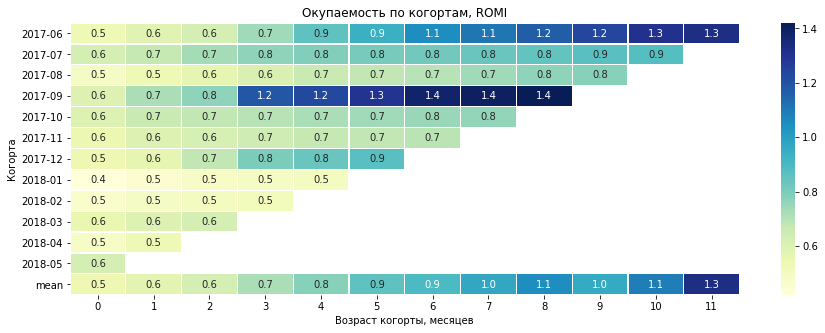

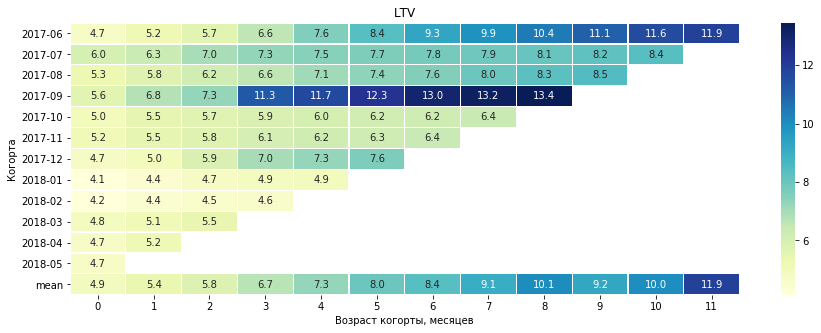

In [53]:
romi = orders_grouped_by_cohorts_ltv.pivot_table(
index = 'first_buy_month', columns = 'age_cohort', values = 'romi', aggfunc = 'mean')

romi = romi.cumsum(axis=1)
romi = romi.reset_index()
romi['first_buy_month'] = romi['first_buy_month'].dt.strftime('%Y-%m')
romi = romi.set_index('first_buy_month')
romi.loc['mean'] = romi.mean()
romi = romi.round(2)

plt.figure(figsize=(15, 5))
plt.title('Окупаемость по когортам, ROMI')
sns.heatmap(romi, annot=True, fmt=".1f", linewidths=.2, cmap="YlGnBu", linecolor = 'white')
plt.xlabel('Возраст когорты, месяцев')
plt.ylabel('Когорта')
plt.show()

ltv = orders_grouped_by_cohorts_ltv.pivot_table(
index = 'first_buy_month', columns = 'age_cohort', values = 'ltv', aggfunc = 'mean')
ltv = ltv.cumsum(axis = 1)
ltv = ltv.reset_index()
ltv['first_buy_month'] = ltv['first_buy_month'].dt.strftime('%Y-%m')
ltv = ltv.set_index('first_buy_month')
ltv.loc['mean'] = ltv.mean()
ltv = ltv.round(2)
ltv

plt.figure(figsize=(15, 5))
plt.title('LTV')
sns.heatmap(ltv, annot=True, fmt=".1f", linewidths=.2, cmap="YlGnBu", linecolor = 'white')
plt.xlabel('Возраст когорты, месяцев')
plt.ylabel('Когорта')
plt.show()

<font color=orange> Затраты на маркетинг окупились в когортах 2017-06 и 2017-09.
Чтобы стоимость привлечения окупалась, необходимо, чтобы стоимость привлечения 1 клиента не была выше 8$.
А для этого мы советуем маркетологам обратить внимание на источники привлечения - 1, 9, 10, а также поработать над конверсией источников, пока лучшая конверсия у источников 1, 2, 9, 10, благодаря чему по ним лучшая стоимость
привлечения 1 клиента.

<div style="border:solid green 2px; padding: 20px"> <h1 style="color:green; margin-bottom:20px">Комментарий наставника</h1>

Маркетинговые показатели рассчитаны верно, все отлично отображено графически.

### <font color=red> Шаг 3. Общий вывод по проделанной работе <a id="step25"></a>   
</div>

На основании проделанной работы, можно сделать следующие выводы:
- сервисом пользуются редко;
- 1 минута - это наиболее частое время посещения сервиса пользователями;
- средний чек 1 покупки - 5$;
- стоимость привлечения одного клиента необходимо держать на уровне - не более 8 долларов (на данный момент это источники 1, 4, 9 и 10);
- на текущий момент маркетологами используется в больше степени источник №3 (предупреждение - стоимость привлечения 1 клиента = 20 долларов, конверсия около 10\%);

Можно сделать вывод что точки роста сервиса - это маркетинговые источники 1, 4, 9 и 10, необходимо обратить на них дополнительное внимание, заказать дополнительные исследования на привлечение средств в эти источники.